# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who: medical professionals
What: Patterns across different variables that can lead to the detection of various diseases
How: Visual graphs that compare variables present the data

# 3. Homework - work with your own data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

df_diabetes = pd.read_csv("diabetes_dataset.csv")
df_kidney = pd.read_csv("Kidney_dataset.csv")
df_hypertension = pd.read_csv("hypertension_dataset.csv")

print("Diabetes Dataset:")
print(df_diabetes.head(), "\n")

print("Kidney Dataset:")
print(df_kidney.head(), "\n")

print("Hypertension Dataset:")
print(df_hypertension.head(), "\n")

Diabetes Dataset:
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0      

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [3]:
print('Diabetes Dataset Info:')
df_diabetes.info()
print('Diabetes Dataset Description:')
print(df_diabetes.describe(include='all'))

Diabetes Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 

In [7]:
print("Diabetes dataset duplicates:", df_diabetes.duplicated().sum())

Diabetes dataset duplicates: 1635


In [8]:
print(df_diabetes.columns)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


There are duplicates, and this could be valid in certain columns such as age, sex, etc. If there were unique identifiers such as Patient ID we could look into those rows more. However, without these unique IDs duplicates are valid and will be kept.

In [10]:
print("Mean:", df_diabetes.mean(numeric_only=True))
print("Median:", df_diabetes.median(numeric_only=True))
print("Mode:", df_diabetes.mode(numeric_only=True).iloc[0])

Mean: Diabetes_binary          0.500000
HighBP                   0.563458
HighChol                 0.525703
CholCheck                0.975259
BMI                     29.856985
Smoker                   0.475273
Stroke                   0.062171
HeartDiseaseorAttack     0.147810
PhysActivity             0.703036
Fruits                   0.611795
Veggies                  0.788774
HvyAlcoholConsump        0.042721
AnyHealthcare            0.954960
NoDocbcCost              0.093914
GenHlth                  2.837082
MentHlth                 3.752037
PhysHlth                 5.810417
DiffWalk                 0.252730
Sex                      0.456997
Age                      8.584055
Education                4.920953
Income                   5.698311
dtype: float64
Median: Diabetes_binary          0.5
HighBP                   1.0
HighChol                 1.0
CholCheck                1.0
BMI                     29.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack

In [11]:
print('Missing or null values in Diabetes Dataset:')
print(df_diabetes.isnull().sum())

Missing or null values in Diabetes Dataset:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


No missing or null = clean

In [12]:
print((df_diabetes < 0).sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


No negatives in these columns. = clean

In [ ]:
print("Age unique values:", sorted(df_diabetes['Age'].unique()))
print("GenHlth values:", df_diabetes['GenHlth'].unique())

Age unique values: [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0), np.float64(10.0), np.float64(11.0), np.float64(12.0), np.float64(13.0)]
GenHlth values: [3. 1. 2. 4. 5.]


These are ordinal categorical values (ex: age ranges). No outliers/strange values = clean

In [15]:
df_diabetes = pd.get_dummies(df_diabetes, columns=['Sex'], drop_first=True)

Diabetes Conclusions: No missing/null data, duplicates were investigated. No apparent inconsistencies. Encoding: most categorical variables were ordinal and left as is, aside from sex which was encoded to numerical (no inherent order, male or female). Data is clean and ready for further modeling or exloratory analysis.

In [4]:
print('Kidney Dataset Info:')
df_kidney.info()
print('Kidney Dataset Description:')
print(df_kidney.describe(include='all'))

Kidney Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease 

In [16]:
print("Kidney dataset duplicates:", df_kidney.duplicated().sum())

Kidney dataset duplicates: 0


In [18]:
print("Mean:", df_kidney.mean(numeric_only=True))
print("Median:", df_kidney.median(numeric_only=True))
print("Mode:", df_kidney.mode(numeric_only=True).iloc[0])

Mean: PatientID                        830.000000
Age                               54.441230
Gender                             0.515371
Ethnicity                          0.713080
SocioeconomicStatus                0.977697
EducationLevel                     1.693189
BMI                               27.620049
Smoking                            0.292948
AlcoholConsumption                 9.969831
PhysicalActivity                   5.024247
DietQuality                        5.028544
SleepQuality                       6.942324
FamilyHistoryKidneyDisease         0.141049
FamilyHistoryHypertension          0.301386
FamilyHistoryDiabetes              0.257384
PreviousAcuteKidneyInjury          0.105485
UrinaryTractInfections             0.210368
SystolicBP                       134.392405
DiastolicBP                       89.313442
FastingBloodSugar                132.529429
HbA1c                              6.983682
SerumCreatinine                    2.753198
BUNLevels                 

In [20]:
print('Missing or null values in Kindey Dataset:')
print(df_kidney.isnull().sum())

Missing or null values in Kindey Dataset:
PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrol

In [24]:
print(df_kidney.columns)

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
       'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQu

In [27]:
print("Age unique values:", sorted(df_kidney['Age'].unique()))

print("Gender unique values:", df_kidney['Gender'].unique())

Age unique values: [np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.int64(72), np.int64(73), np.int64(74), np.int64(75), np.int64(76), np.int64(77), np.int64(78), np.int64(79), np.int64(80), np.int64(81), np.int64(82), np.int64(83), np.int64(84), np.int64(85), np.int64(86), np.int64(87), np.int64(88), np.int64(89), 

Age is done numerically (not in age ranges like the Diabetes Dataset) and Gender is numerical 0 or 1. =clean

Kidney Dataset Conclusions: The kidney dataset is clean and ready for modeling. No duplicates or null info. Ages are normal, gender/sex is numerical 0, 1. No major outliers.

In [5]:
print('Hypertension Dataset Info:')
df_hypertension.info()
print('Hypertension Dataset Description:')
print(df_hypertension.describe(include='all'))

Hypertension Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174982 entries, 0 to 174981
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  174982 non-null  object 
 1   Age                      174982 non-null  int64  
 2   BMI                      174982 non-null  float64
 3   Cholesterol              174982 non-null  int64  
 4   Systolic_BP              174982 non-null  int64  
 5   Diastolic_BP             174982 non-null  int64  
 6   Smoking_Status           174982 non-null  object 
 7   Alcohol_Intake           174982 non-null  float64
 8   Physical_Activity_Level  174982 non-null  object 
 9   Family_History           174982 non-null  object 
 10  Diabetes                 174982 non-null  object 
 11  Stress_Level             174982 non-null  int64  
 12  Salt_Intake              174982 non-null  float64
 13  Sleep_Duration           174982 

In [17]:
print("Hypertension dataset duplicates:", df_hypertension.duplicated().sum())

Hypertension dataset duplicates: 0


In [19]:
print("Mean:", df_hypertension.mean(numeric_only=True))
print("Median:", df_hypertension.median(numeric_only=True))
print("Mode:", df_hypertension.mode(numeric_only=True).iloc[0])

Mean: Age                53.493319
BMI                27.494672
Cholesterol       224.539335
Systolic_BP       134.505229
Diastolic_BP       89.450315
Alcohol_Intake     14.991069
Stress_Level        5.013041
Salt_Intake         8.482757
Sleep_Duration      6.996468
Heart_Rate         74.495085
LDL               129.528271
HDL                64.573105
Triglycerides     149.569836
Glucose           134.488187
dtype: float64
Median: Age                54.0
BMI                27.5
Cholesterol       225.0
Systolic_BP       135.0
Diastolic_BP       89.0
Alcohol_Intake     15.0
Stress_Level        5.0
Salt_Intake         8.5
Sleep_Duration      7.0
Heart_Rate         74.0
LDL               130.0
HDL                65.0
Triglycerides     150.0
Glucose           134.0
dtype: float64
Mode: Age                73.0
BMI                22.5
Cholesterol       178.0
Systolic_BP       174.0
Diastolic_BP       85.0
Alcohol_Intake      6.7
Stress_Level        7.0
Salt_Intake         9.9
Sleep_Duration  

In [21]:
print('Missing or null values in Hypertension Dataset:')
print(df_hypertension.isnull().sum())

Missing or null values in Hypertension Dataset:
Country                    0
Age                        0
BMI                        0
Cholesterol                0
Systolic_BP                0
Diastolic_BP               0
Smoking_Status             0
Alcohol_Intake             0
Physical_Activity_Level    0
Family_History             0
Diabetes                   0
Stress_Level               0
Salt_Intake                0
Sleep_Duration             0
Heart_Rate                 0
LDL                        0
HDL                        0
Triglycerides              0
Glucose                    0
Gender                     0
Education_Level            0
Employment_Status          0
Hypertension               0
dtype: int64


In [25]:
print(df_hypertension.columns)

Index(['Country', 'Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
       'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity_Level',
       'Family_History', 'Diabetes', 'Stress_Level', 'Salt_Intake',
       'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides',
       'Glucose', 'Gender', 'Education_Level', 'Employment_Status',
       'Hypertension'],
      dtype='object')


In [28]:
print("Age unique values:", sorted(df_hypertension['Age'].unique()))
print("Systolic_BP unique values:", sorted(df_hypertension['Systolic_BP'].unique()))
print("Gender unique values:", df_hypertension['Gender'].unique())

Age unique values: [np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.int64(72), np.int64(73), np.int64(74), np.int64(75), np.int64(76), np.int64(77), np.int64(78), np.int64(79), np.int64(80), np.int64(81), np.int64(82), np.int64(83), np.int64(84), np.int64(85), np.int64(86), np.int64(87), 

Age is done numerically (like Kindey, not in range like Diabetes), SBP is normal values, and Gender is done in Female or Male verbiage(encoded below). = clean

In [29]:
df_hypertension = pd.get_dummies(df_hypertension, columns=['Gender'], drop_first=True)

Hypertension Dataset Conclusions: The kidney dataset is clean and ready for modeling. No duplicates or null info. Ages, blood pressure, etc. are normal medical values, gender/sex one hot encoded to numerical 0, 1. No major outliers.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

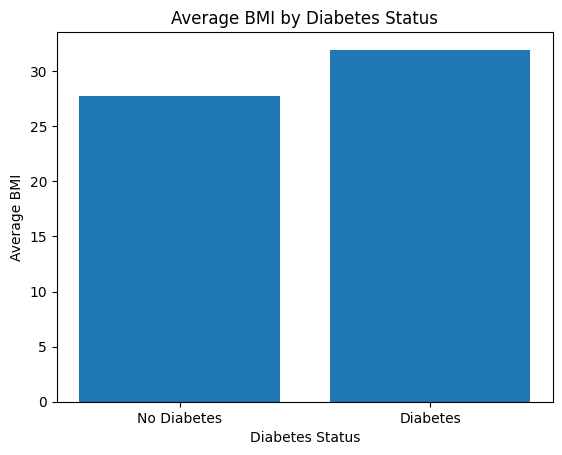

In [35]:
import matplotlib.pyplot as plt
avg_bmi = df_diabetes.groupby('Diabetes_binary')['BMI'].mean()
plt.bar(['No Diabetes', 'Diabetes'], avg_bmi)
plt.xlabel('Diabetes Status')
plt.ylabel('Average BMI')
plt.title('Average BMI by Diabetes Status')
plt.show()


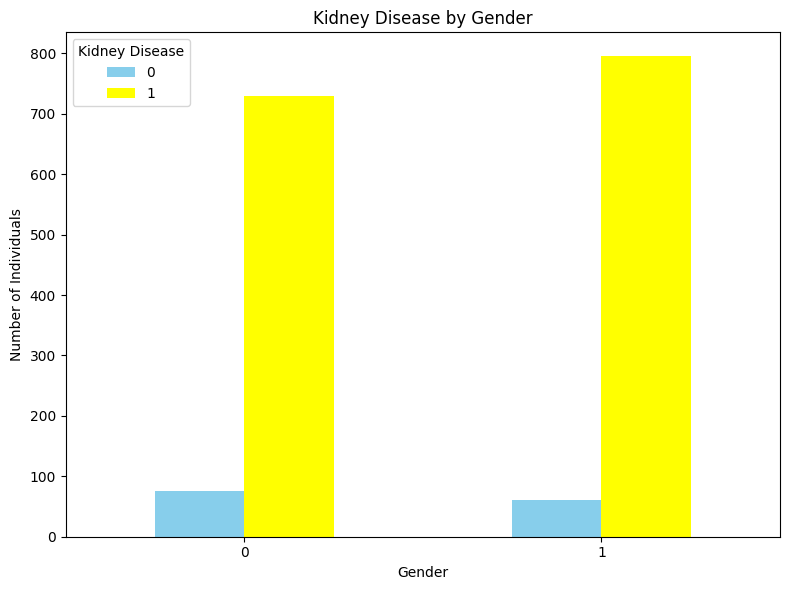

In [40]:
import matplotlib.pyplot as plt
kidney_counts = df_kidney.groupby(['Gender', 'Diagnosis']).size().unstack()
kidney_counts.plot(kind='bar', figsize=(8,6), color=['skyblue', 'yellow'])
plt.title('Kidney Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.legend(title='Kidney Disease')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

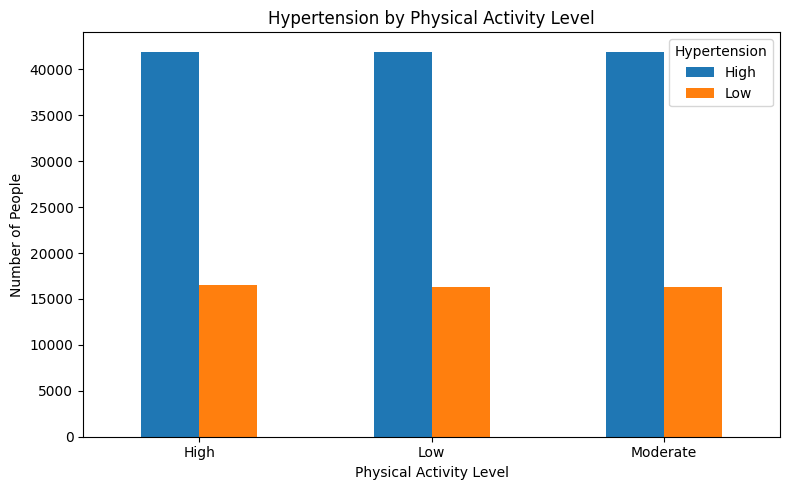

In [41]:
import matplotlib.pyplot as plt
activity_hyper_counts = df_hypertension.groupby(['Physical_Activity_Level', 'Hypertension']).size().unstack()
activity_hyper_counts.plot(kind='bar', figsize=(8, 5))
plt.title('Hypertension by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.legend(title='Hypertension')
plt.tight_layout()
plt.show()